In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

**We would like to see analysis of:**

 

- **Presidents Approval**
- General Election
- US Senate
- US House
- Governor
- Generic Ballot (optional)
 

Please provide the analysis in a format of your choosing (not looking for specific formats, looking specifically for data analysis). If there are any questions around the data set, please include those questions with the analysis.

Files to be used:
<br>
> `president_approval_polls.csv` <br>
> `president_polls.csv` <br>
> `generic_ballot_polls.csv` <br>
> `president_primary_polls.csv` <br>
> `senate_polls.csv` <br>
> `house_polls.csv` <br>
> `governor_polls.csv` <br>
> `president_primary_polls` <br>
> `presidential_poll_averages_2020.csv` <br>


In [3]:
#code
def floatify(x):
    try:
        return float(int(x.replace("%",'')))
    except:
        return x
    
def eda(dataframe):
    print("Missing Values \n \n", dataframe.isnull().sum(),"\n")
    print("Duplicate Rows \n", dataframe.duplicated().sum(),"\n")
    print("Dataframe Types \n \n", dataframe.dtypes,"\n")
    print("Dataframe Shape \n", dataframe.shape,"\n")
    print("Dataframe Describe \n \n", dataframe.describe(include='all'),"\n")
    for item in dataframe:
        print(item)

In [4]:
df = pd.read_csv('polls/president_approval_polls.csv')
df.head()

,question_id,poll_id,state,politician_id,politician,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,fte_grade,sample_size,population,population_full,methodology,start_date,end_date,sponsor_candidate,tracking,created_at,notes,url,source,yes,no
0,129457,69495,NaN,11,Donald Trump,568,YouGov,NaN,NaN,YouGov,391.0,YouGov,B,1000,a,a,Online,9/14/20,9/16/20,NaN,NaN,9/16/20 16:01,NaN,https://docs.cdn.yougov.com/0yvk2ms1ly/tabs_Tr...,538,42.0,53.0
1,129458,69495,NaN,11,Donald Trump,568,YouGov,NaN,NaN,YouGov,391.0,YouGov,B,841,rv,rv,Online,9/14/20,9/16/20,NaN,NaN,9/16/20 16:01,NaN,https://docs.cdn.yougov.com/0yvk2ms1ly/tabs_Tr...,538,41.0,57.0
2,129432,69484,NaN,11,Donald Trump,568,YouGov,NaN,NaN,YouGov,391.0,YouGov,B,1000,a,a,Online,9/13/20,9/16/20,NaN,NaN,9/16/20 11:48,NaN,https://docs.cdn.yougov.com/leup4mgcko/tabs_Tr...,538,41.0,53.0
3,129433,69484,NaN,11,Donald Trump,568,YouGov,NaN,NaN,YouGov,391.0,YouGov,B,806,rv,rv,Online,9/13/20,9/16/20,NaN,NaN,9/16/20 11:48,NaN,https://docs.cdn.yougov.com/leup4mgcko/tabs_Tr...,538,42.0,57.0
4,129412,69478,NaN,11,Donald Trump,568,YouGov,352,Economist,YouGov,391.0,YouGov,B,1500,a,a,Online,9/13/20,9/15/20,NaN,NaN,9/16/20 10:27,NaN,https://docs.cdn.yougov.com/t0hi1tcqs5/econTab...,538,45.0,51.0


In [5]:
eda(df)

Missing Values 
 
 question_id                0
poll_id                    0
state                   9461
politician_id              0
politician                 0
pollster_id                0
pollster                   0
sponsor_ids             5552
sponsors                5552
display_name               0
pollster_rating_id        10
pollster_rating_name      10
fte_grade                257
sample_size                0
population                 0
population_full            0
methodology              137
start_date                 0
end_date                   0
sponsor_candidate       9461
tracking                5446
created_at                 0
notes                   9442
url                        2
source                     0
yes                        0
no                         0
dtype: int64 

Duplicate Rows 
 0 

Dataframe Types 
 
 question_id               int64
poll_id                   int64
state                   float64
politician_id             int64
politician    

In [7]:
df['yes'].describe()

count    9461.000000
mean       42.402543
std         3.424216
min        23.900000
25%        40.000000
50%        42.000000
75%        45.000000
max        59.000000
Name: yes, dtype: float64

In [8]:
df['no'].describe()

count    9461.000000
mean       53.355062
std         3.037374
min        35.000000
25%        51.600000
50%        53.000000
75%        55.000000
max        75.900000
Name: no, dtype: float64

In [9]:
df['pollster'].value_counts(dropna=False)

YouGov                                      2987
Ipsos                                       2025
Morning Consult                             1049
Rasmussen Reports/Pulse Opinion Research     925
Harris Insights & Analytics                  507
                                            ... 
PSB Research                                   1
Heart+Mind Strategies                          1
Basswood Research                              1
SocialSphere                                   1
Opinion Savvy/InsiderAdvantage                 1
Name: pollster, Length: 79, dtype: int64

In [13]:
type(df.columns)

pandas.core.indexes.base.Index

In [17]:
df.columns.to_list()

['question_id',
 'poll_id',
 'state',
 'politician_id',
 'politician',
 'pollster_id',
 'pollster',
 'sponsor_ids',
 'sponsors',
 'display_name',
 'pollster_rating_id',
 'pollster_rating_name',
 'fte_grade',
 'sample_size',
 'population',
 'population_full',
 'methodology',
 'start_date',
 'end_date',
 'sponsor_candidate',
 'tracking',
 'created_at',
 'notes',
 'url',
 'source',
 'yes',
 'no']

In [18]:
column_list = df.columns.to_list()
column_list

['question_id',
 'poll_id',
 'state',
 'politician_id',
 'politician',
 'pollster_id',
 'pollster',
 'sponsor_ids',
 'sponsors',
 'display_name',
 'pollster_rating_id',
 'pollster_rating_name',
 'fte_grade',
 'sample_size',
 'population',
 'population_full',
 'methodology',
 'start_date',
 'end_date',
 'sponsor_candidate',
 'tracking',
 'created_at',
 'notes',
 'url',
 'source',
 'yes',
 'no']

In [21]:
for i in column_list:
    print(df[i].value_counts(dropna=False))

77453     1
128284    1
116026    1
92423     1
93495     1
         ..
123577    1
92856     1
82613     1
84660     1
125489    1
Name: question_id, Length: 9461, dtype: int64
50841    4
49456    3
49834    3
53744    3
49650    3
        ..
58760    1
69005    1
49561    1
66964    1
67585    1
Name: poll_id, Length: 6413, dtype: int64
NaN    9461
Name: state, dtype: int64
11    9461
Name: politician_id, dtype: int64
Donald Trump    9461
Name: politician, dtype: int64
568     2987
744     2025
1189    1049
399      925
1416     457
        ... 
1347       1
1075       1
379        1
1490       1
48         1
Name: pollster_id, Length: 87, dtype: int64
YouGov                                      2987
Ipsos                                       2025
Morning Consult                             1049
Rasmussen Reports/Pulse Opinion Research     925
Harris Insights & Analytics                  507
                                            ... 
PSB Research                               

In [9]:
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])
df['created_at'] = pd.to_datetime(df['created_at'])
df.dtypes

question_id                      int64
poll_id                          int64
state                          float64
politician_id                    int64
politician                      object
pollster_id                      int64
pollster                        object
sponsor_ids                     object
sponsors                        object
display_name                    object
pollster_rating_id             float64
pollster_rating_name            object
fte_grade                       object
sample_size                      int64
population                      object
population_full                 object
methodology                     object
start_date              datetime64[ns]
end_date                datetime64[ns]
sponsor_candidate              float64
tracking                        object
created_at              datetime64[ns]
notes                           object
url                             object
source                          object
yes                      

In [11]:
df['tracking'].value_counts()

True    4015
Name: tracking, dtype: int64

In [12]:
df['length_of_poll'] = ((df['end_date'] - df['start_date']).dt.days)
df.head()

,question_id,poll_id,state,politician_id,politician,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,fte_grade,sample_size,population,population_full,methodology,start_date,end_date,sponsor_candidate,tracking,created_at,notes,url,source,yes,no,length_of_poll
0,129457,69495,NaN,11,Donald Trump,568,YouGov,NaN,NaN,YouGov,391.0,YouGov,B,1000,a,a,Online,2020-09-14,2020-09-16,NaN,NaN,2020-09-16 16:01:00,NaN,https://docs.cdn.yougov.com/0yvk2ms1ly/tabs_Tr...,538,42.0,53.0,2
1,129458,69495,NaN,11,Donald Trump,568,YouGov,NaN,NaN,YouGov,391.0,YouGov,B,841,rv,rv,Online,2020-09-14,2020-09-16,NaN,NaN,2020-09-16 16:01:00,NaN,https://docs.cdn.yougov.com/0yvk2ms1ly/tabs_Tr...,538,41.0,57.0,2
2,129432,69484,NaN,11,Donald Trump,568,YouGov,NaN,NaN,YouGov,391.0,YouGov,B,1000,a,a,Online,2020-09-13,2020-09-16,NaN,NaN,2020-09-16 11:48:00,NaN,https://docs.cdn.yougov.com/leup4mgcko/tabs_Tr...,538,41.0,53.0,3
3,129433,69484,NaN,11,Donald Trump,568,YouGov,NaN,NaN,YouGov,391.0,YouGov,B,806,rv,rv,Online,2020-09-13,2020-09-16,NaN,NaN,2020-09-16 11:48:00,NaN,https://docs.cdn.yougov.com/leup4mgcko/tabs_Tr...,538,42.0,57.0,3
4,129412,69478,NaN,11,Donald Trump,568,YouGov,352,Economist,YouGov,391.0,YouGov,B,1500,a,a,Online,2020-09-13,2020-09-15,NaN,NaN,2020-09-16 10:27:00,NaN,https://docs.cdn.yougov.com/t0hi1tcqs5/econTab...,538,45.0,51.0,2


In [13]:
df['yes_>_no'] = df['yes'] > df['no']
df['yes_>_no'] = df['yes_>_no'].apply(lambda x: 1 if x == True else 0)
df.head()

,question_id,poll_id,state,politician_id,politician,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,fte_grade,sample_size,population,population_full,methodology,start_date,end_date,sponsor_candidate,tracking,created_at,notes,url,source,yes,no,length_of_poll,yes_>_no
0,129457,69495,NaN,11,Donald Trump,568,YouGov,NaN,NaN,YouGov,391.0,YouGov,B,1000,a,a,Online,2020-09-14,2020-09-16,NaN,NaN,2020-09-16 16:01:00,NaN,https://docs.cdn.yougov.com/0yvk2ms1ly/tabs_Tr...,538,42.0,53.0,2,0
1,129458,69495,NaN,11,Donald Trump,568,YouGov,NaN,NaN,YouGov,391.0,YouGov,B,841,rv,rv,Online,2020-09-14,2020-09-16,NaN,NaN,2020-09-16 16:01:00,NaN,https://docs.cdn.yougov.com/0yvk2ms1ly/tabs_Tr...,538,41.0,57.0,2,0
2,129432,69484,NaN,11,Donald Trump,568,YouGov,NaN,NaN,YouGov,391.0,YouGov,B,1000,a,a,Online,2020-09-13,2020-09-16,NaN,NaN,2020-09-16 11:48:00,NaN,https://docs.cdn.yougov.com/leup4mgcko/tabs_Tr...,538,41.0,53.0,3,0
3,129433,69484,NaN,11,Donald Trump,568,YouGov,NaN,NaN,YouGov,391.0,YouGov,B,806,rv,rv,Online,2020-09-13,2020-09-16,NaN,NaN,2020-09-16 11:48:00,NaN,https://docs.cdn.yougov.com/leup4mgcko/tabs_Tr...,538,42.0,57.0,3,0
4,129412,69478,NaN,11,Donald Trump,568,YouGov,352,Economist,YouGov,391.0,YouGov,B,1500,a,a,Online,2020-09-13,2020-09-15,NaN,NaN,2020-09-16 10:27:00,NaN,https://docs.cdn.yougov.com/t0hi1tcqs5/econTab...,538,45.0,51.0,2,0


In [14]:
df['yes_>_no'].value_counts(dropna=False, normalize=True)

0    0.968291
1    0.031709
Name: yes_>_no, dtype: float64

In [15]:
df['yes_>_no'].value_counts(dropna=False)

0    9161
1     300
Name: yes_>_no, dtype: int64

In [43]:
df.groupby('length_of_poll')['yes_>_no'].mean()

length_of_poll
0     0.028571
1     0.007371
2     0.032758
3     0.013793
4     0.077113
5     0.004950
6     0.001527
7     0.008850
8     0.000000
9     0.058824
10    0.000000
11    0.000000
12    0.142857
13    0.030303
14    0.055556
15    0.000000
16    0.000000
17    0.333333
18    0.000000
22    0.000000
23    0.000000
24    0.000000
27    0.000000
29    0.000000
31    0.000000
33    0.000000
37    0.000000
Name: yes_>_no, dtype: float64

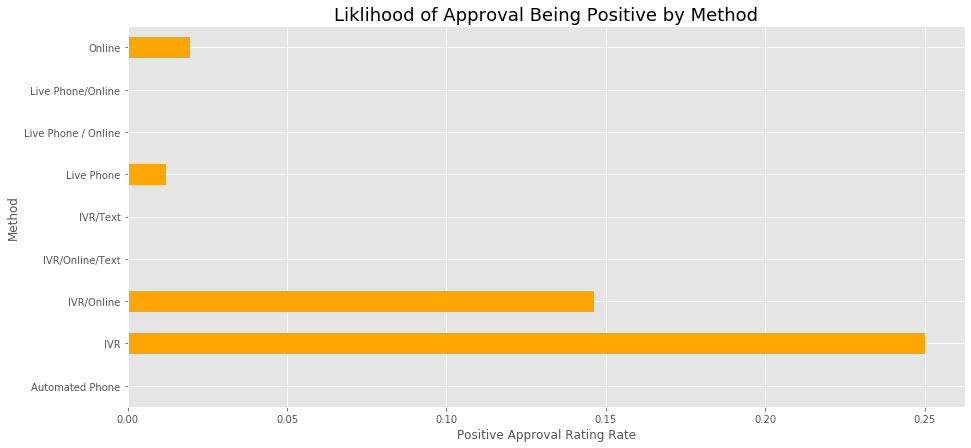

In [17]:
plt.figure(figsize=(15,7))
plt.style.use('ggplot')
df.groupby(['methodology']).mean()['yes_>_no'].plot(kind='barh', color='orange')

plt.xlabel('Positive Approval Rating Rate', size=12);
plt.ylabel('Method', size=12);
plt.title('Liklihood of Approval Being Positive by Method', size=18);

**Notes Here** <br>

- The `Live Phone/Online` and `Live Phone / Online` values should be merged
- There are 4 different IVR components
- There should be a better data description to determine if some of these can be merged, omitted, or outright cleaned
- I also know that there are *137* `NaN` values that aren't being accounted for, could be dropped.

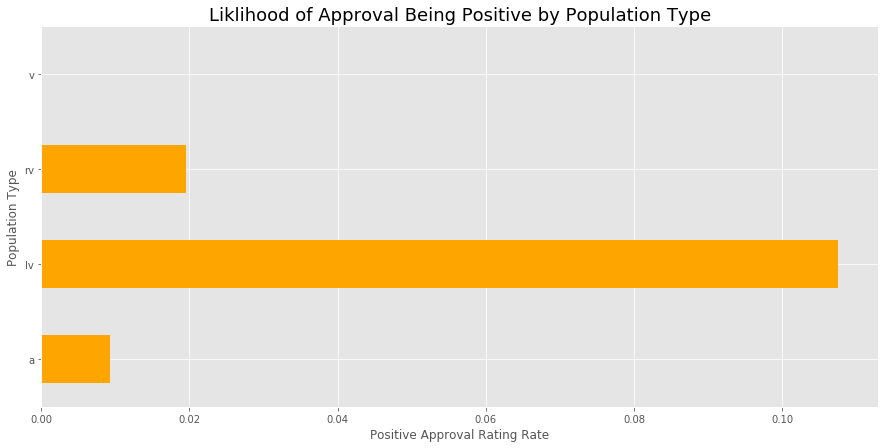

In [18]:
plt.figure(figsize=(15,7))
df.groupby(['population']).mean()['yes_>_no'].plot(kind='barh', color='orange')

plt.xlabel('Positive Approval Rating Rate', size=12);
plt.ylabel('Population Type', size=12);
plt.title('Liklihood of Approval Being Positive by Population Type', size=18);

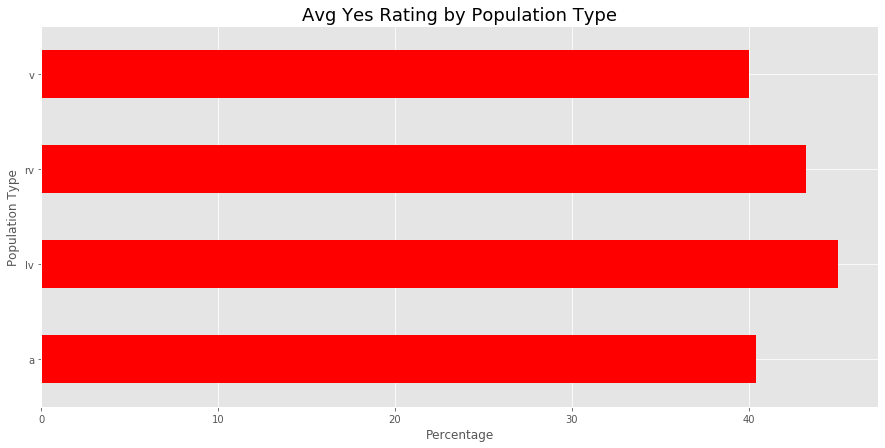

In [21]:
plt.figure(figsize=(15,7))
df.groupby(['population']).mean()['yes'].plot(kind='barh', color='red')

plt.xlabel('Percentage', size=12);
plt.ylabel('Population Type', size=12);
plt.title('Avg Yes Rating by Population Type', size=18);

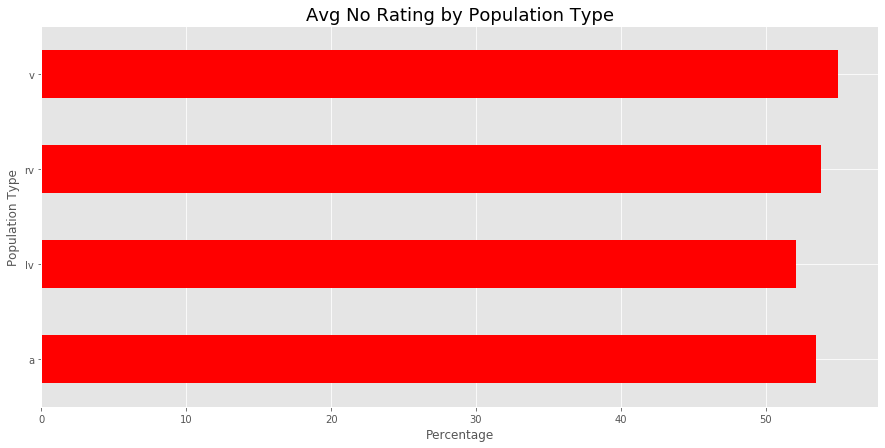

In [22]:
plt.figure(figsize=(15,7))
df.groupby(['population']).mean()['no'].plot(kind='barh', color='red')

plt.xlabel('Percentage', size=12);
plt.ylabel('Population Type', size=12);
plt.title('Avg No Rating by Population Type', size=18);

In [37]:
df.groupby(['methodology'])['no'].mean().sort_values()

methodology
IVR                  51.300000
IVR/Online           51.768817
Online               53.381632
IVR/Text             53.400000
Automated Phone      53.700000
Live Phone           54.357855
IVR/Online/Text      55.111111
Live Phone/Online    58.000000
Name: no, dtype: float64

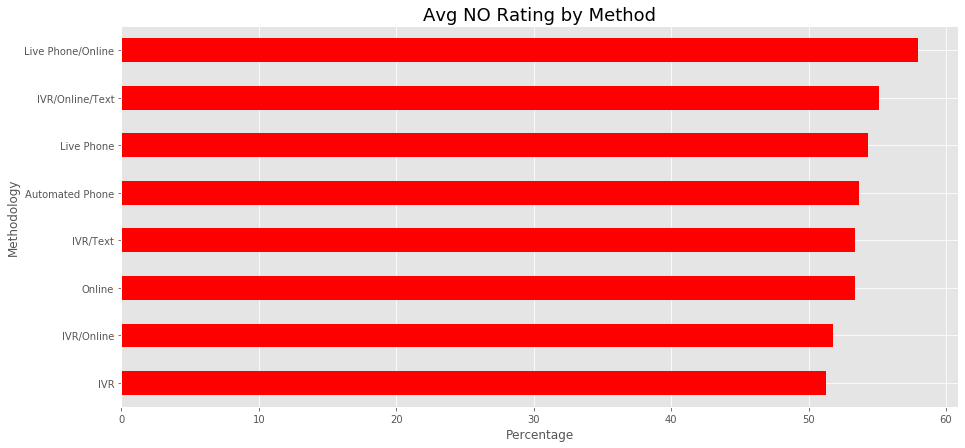

In [41]:
plt.figure(figsize=(15,7))
df.groupby(['methodology'])['no'].mean().sort_values().plot(kind='barh', color='red')

plt.xlabel('Percentage', size=12);
plt.ylabel('Methodology', size=12);
plt.title('Avg NO Rating by Method', size=18);

In [27]:
df.loc[df['methodology'] == 'Live Phone / Online', 'methodology'] = 'Live Phone/Online'

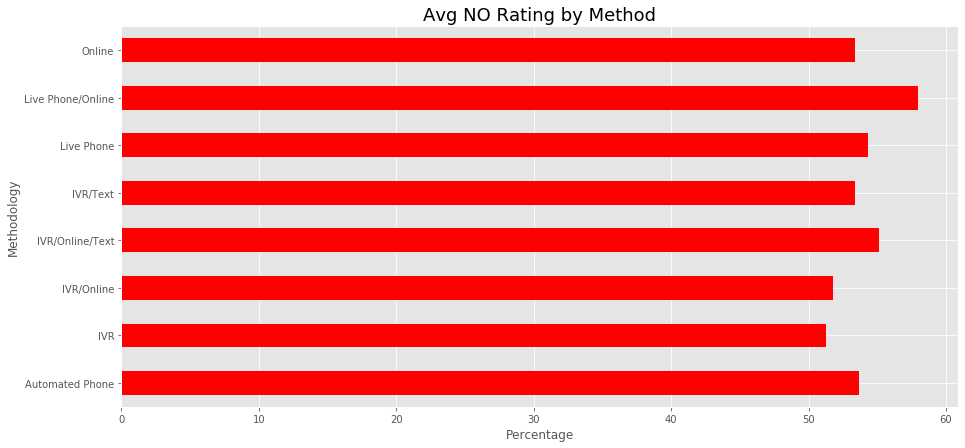

In [28]:
plt.figure(figsize=(15,7))
df.groupby(['methodology']).mean()['no'].plot(kind='barh', color='red')

plt.xlabel('Percentage', size=12);
plt.ylabel('Methodology', size=12);
plt.title('Avg NO Rating by Method', size=18);

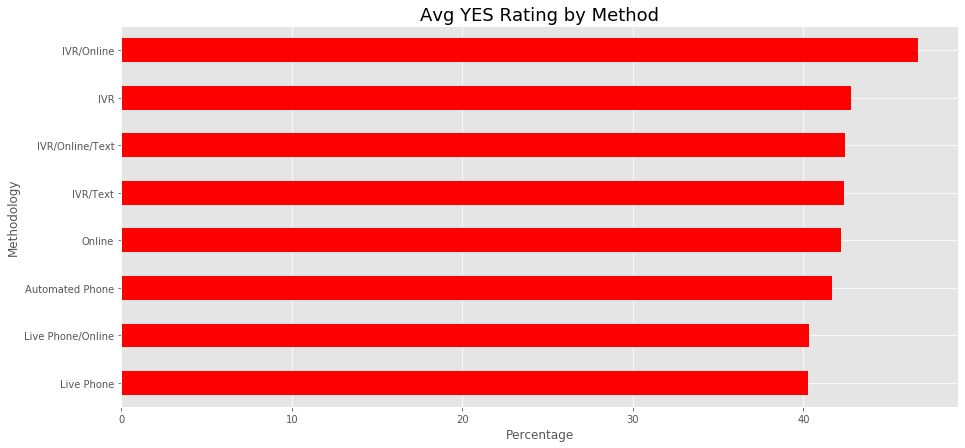

In [39]:
plt.figure(figsize=(15,7))
df.groupby(['methodology']).mean()['yes'].sort_values().plot(kind='barh', color='red')

plt.xlabel('Percentage', size=12);
plt.ylabel('Methodology', size=12);
plt.title('Avg YES Rating by Method', size=18);

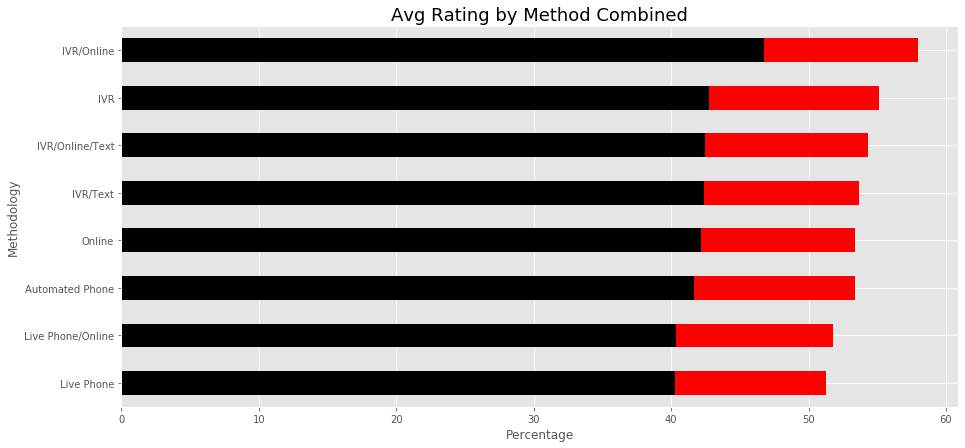

In [43]:
plt.figure(figsize=(15,7))
df.groupby(['methodology'])['no'].mean().sort_values().plot(kind='barh', color='red')
df.groupby(['methodology']).mean()['yes'].sort_values().plot(kind='barh', color='black')

plt.xlabel('Percentage', size=12);
plt.ylabel('Methodology', size=12);
plt.title('Avg Rating by Method Combined', size=18);

In [42]:
df['length_of_poll'].value_counts(dropna=False)

2     3358
4     2023
6     1310
1     1221
3     1015
5      202
7      113
0       70
13      33
8       28
14      18
9       17
10       9
11       8
12       7
15       6
22       5
31       4
17       3
16       3
27       2
18       1
33       1
23       1
29       1
24       1
37       1
Name: length_of_poll, dtype: int64

**Rytas Notes on Polls**<br>
- `question_id`,`poll_id`, `politician_id`, `politician`, are uninformative
